In [1]:
import tarfile
import os
import pandas as pd
from loguru import logger
from openbabel import openbabel
import rdkit.Chem as ch

In [37]:
"""path"""

WORK_DIR = os.path.curdir
DEBUG_DIR = os.path.join(WORK_DIR,'debug')
# @TODO argparse data path


"""FOR DEBUG"""
DATA_ROOT = os.path.join(DEBUG_DIR,'example')
TMP_DIR = os.path.join(DEBUG_DIR,'tmp')
if not os.path.isdir(TMP_DIR):
    os.makedirs(TMP_DIR)
OUT_DIR = os.path.join(DEBUG_DIR,'output')

"""logging"""

DEBUG = True

LOG_DIR = os.path.join(WORK_DIR,'log')
if not os.path.exists(LOG_DIR):
    os.makedirs(LOG_DIR)

LOG_FILE = os.path.join(LOG_DIR,'debug_{time}.log')

logger.add(LOG_FILE,retention=2)

if DEBUG:
    logger.debug('debug data directory: {}'.format(DEBUG_DIR))

ModuleNotFoundError: No module named 'win32_setctime'

# Timing

In [2]:
import time
import contextlib

@contextlib.contextmanager
def timing(msg: str):
    logger.info('Started {}'.format(msg))
    tic = time.time()
    yield
    toc = time.time()
    logger.info('Finished %s in %.3f seconds'%(msg, toc - tic))

with timing("extract-tarfile"):
    logger.info("finished")

2022-07-03 18:57:44.702 | INFO     | __main__:timing:6 - Started extract-tarfile
2022-07-03 18:57:44.703 | INFO     | __main__:<module>:13 - finished
2022-07-03 18:57:44.703 | INFO     | __main__:timing:10 - Finished extract-tarfile in 0.000 seconds


# Tar Extractor

import tarfile

dir_1 = './debug/example/AA/'
tar_1 = os.path.join(dir_1, 'AABAAC.tar')
dir_2 = os.path.join(TMP_DIR, 'AABAAC')
tar_2_gz =  os.path.join(dir_2, '00000.tar.gz')

with  tarfile.open(tar_1) as tar:
    tar.extractall(TMP_DIR)
    names = tar.getnames()


In [22]:
from tqdm import tqdm

for d in os.listdir(DATA_ROOT):
    # d: "AA"
    d_path = os.path.join(DATA_ROOT,d)
    for f in tqdm(os.listdir(d_path)):
        # f: "AABAAC.tar"
        # if i == 2: break
        """critical section"""
        with tarfile.open(os.path.join(d_path,f)) as tf:
            names = tf.getnames()
            # name: "AABAAC/00000.tar.gz,...."
            tf.extractall(TMP_DIR)
            # to "tmp/AABAAC/00000.tar.gz"

        for name in names:
            # name: "AABAAC"
            dirname = os.path.dirname(name)
            with tarfile.open(os.path.join(TMP_DIR, name)) as tf:
                tf.extractall(os.path.join(TMP_DIR, dirname))

100%|██████████| 204/204 [00:18<00:00, 11.08it/s]


# Format Converter

In [39]:

import openbabel
def file_convert(inputFile, outputFile, inFormat='pdbqt', outFormat='sdf'):
    conv= openbabel.OBConversion("debug/tmp/AABABD/00000/Z18500480_1_T1.pdbqt", "debug/Z18500480_1_T1.smiles")
    conv.OpenInAndOutFiles("pdbqt","smiles")
    conv.Convert()
    conv.CloseOutFile()

In [20]:
input_file = "debug/tmp/AABABD/00000/Z18500480_1_T1.pdbqt"
os.path.dirname(input_file)
os.path.splitext(os.path.basename(input_file))[0]+'.smiles'

# os.path.ex

'Z18500480_1_T1.smiles'

In [12]:
import openbabel,pybel

mol = openbabel.OBMol()
a = mol.NewAtom()
a.SetAtomicNum(6)   # carbon atom
a.SetVector(0.0, 1.0, 2.0) # coordinates
b = mol.NewAtom()
mol.AddBond(1, 2, 1)   # atoms indexed from 1

pybelmol = pybel.Molecule(mol)
pybelmol.write("sdf", "outputfile.sdf")

OSError: outputfile.sdf already exists. Use 'overwrite=True' to overwrite it.

In [31]:
from concurrent import futures


def f(a, b):
    return [a**b]

"""Test for concurrent.futures"""
# if __name__ == '__main__':
with timing("parallel"):
    with futures.ProcessPoolExecutor(1) as executor:
        for i in range(100, 5000):
            future = executor.submit(f, i, i+1)
        # print(future.result())

2022-07-01 20:51:37.121 | INFO     | __main__:timing:6 - Started parallel


BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore

In [1]:
from  data.tools import utils, converter

with utils.tmpdir_manager('./debug') as tmp_dir:
    tar_extractor = extractor.Extractor(
            data_dir='./debug/example',
            n_cpu=1)
    converter = converter.Converter(tmp_dir, 'pdbqt', 'sdf')
    tar_extractor.extract(tmp_dir)
    for d_1 in os.listdir(tmp_dir):
        logger.info(d_1)
        for d_2 in os.listdir(os.path.join(os.path.dirname(tmp_dir),d_1)):
            logger.info(d_2)
            for pdbqt_file in os.listdir(d_2):
            #     logger.info(pdbqt_file)

ModuleNotFoundError: No module named 'loguru'

# rdkit mol

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as ch
import matplotlib.pyplot as plt  # 画图

supp = Chem.SDMolSupplier('./debug/Z18500480_1_T1.sdf')
bi = {}
mols_fps_Morgen = [(m, ch.GetMorganFingerprintAsBitVect(m, radius=2, bitInfo=bi)) for m in supp]
print(bi)


{314: ((2, 1),), 370: ((5, 2),), 475: ((0, 1),), 576: ((5, 0),), 623: ((11, 2),), 650: ((2, 0), (12, 0)), 666: ((11, 1),), 674: ((8, 0),), 738: ((5, 1),), 771: ((1, 1),), 807: ((7, 0), (11, 0)), 856: ((4, 1),), 881: ((10, 0),), 906: ((9, 1), (13, 1)), 935: ((0, 0), (3, 0)), 1037: ((4, 0), (9, 0), (13, 0)), 1102: ((10, 1),), 1145: ((6, 1),), 1199: ((6, 2),), 1209: ((8, 2),), 1263: ((1, 2),), 1370: ((10, 2),), 1380: ((1, 0), (6, 0)), 1602: ((7, 1),), 1610: ((3, 1),), 1659: ((8, 1),), 1705: ((0, 2),), 1917: ((12, 1),), 2006: ((3, 2),)}


In [16]:
mols_fps_Morgen[0][1]

In [8]:
len(mols_fps_Morgen)

1

## 一个很好用的SimilarityMap

In [88]:
from rdkit.Chem.Draw import SimilarityMaps

# 目标分子
targetmol = Chem.MolFromSmiles(
    'COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
# 参考分子
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

Draw.MolDraw2DSVG(400, 400)
d.ClearDrawing()
target_mol_simi_fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(
    refmol,
    targetmol,
    lambda m, i: SimilarityMaps.GetMorganFingerprint(
        m, i, radius=2, fpType='bv'),
    draw2d=d
)
print(target_mol_simi_fig)  # Figure(250x250)
print(maxweight)  # 0.12255947497949138
d.FinishDrawing()
with open('./mol28.svg', 'w+') as outf:
    outf.write(d.GetDrawingText())
# d.ClearDrawing()

0.12255947497949138


In [5]:
from rdkit.DataStructs import ExplicitBitVect, CreateFromBinaryText
m = Chem.MolFromSmiles(
    'COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
bi = {}
fp = ch.GetMorganFingerprintAsBitVect(m, radius=2)
fp = ch.GetMACCSKeysFingerprint(m)
base64 = ExplicitBitVect.ToBase64(fp)
print(base64)

# _fp = ExplicitBitVect.
_fp = ExplicitBitVect(0)
ExplicitBitVect.FromBase64(_fp, base64)

with open('./mol1','w+') as f:
    f.write(base64)
print(_fp.ToBase64())
# fp.FromBase64(base64)


4P///6cAAAA8AAAAcggEDAQGAAIAAgAGAAAAAgACAgAEAAgAAgYAAgAABAAAAAAGAgIABgACAAAABAAAAAAAAAAAAAAAAAAAAg==
4P///6cAAAA8AAAAcggEDAQGAAIAAgAGAAAAAgACAgAEAAgAAgYAAgAABAAAAAAGAgIABgACAAAABAAAAAAAAAAAAAAAAAAAAg==


In [193]:
from data.tools import utils
tmp_dir = os.path.join(os.path.curdir,'debug','tmp')
# with utils.tmpdir_manager() as tmp_dir:

for i, d_1 in enumerate(os.listdir(tmp_dir)):
    if i > 1: break
    dpath_1 = os.path.join(tmp_dir, d_1)
    for d_2 in os.listdir(dpath_1):
        dpath_2 = os.path.join(dpath_1, d_2)
        if os.path.isdir(dpath_2):
            for f in os.listdir(dpath_2):
                logger.info(os.path.join(dpath_2, f))
                logger.info(os.path.splitext(f)[0])
                # logger.debug(f)



2022-07-03 22:22:40.017 | INFO     | __main__:<module>:12 - .\debug\tmp\AABAAC\00000\Z1252751589_1_T1.pdbqt
2022-07-03 22:22:40.018 | INFO     | __main__:<module>:13 - Z1252751589_1_T1
2022-07-03 22:22:40.018 | INFO     | __main__:<module>:12 - .\debug\tmp\AABAAC\00000\Z1509950178_1_T1.pdbqt
2022-07-03 22:22:40.018 | INFO     | __main__:<module>:13 - Z1509950178_1_T1
2022-07-03 22:22:40.020 | INFO     | __main__:<module>:12 - .\debug\tmp\AABAAC\00000\Z1510155714_1_T1.pdbqt
2022-07-03 22:22:40.020 | INFO     | __main__:<module>:13 - Z1510155714_1_T1
2022-07-03 22:22:40.021 | INFO     | __main__:<module>:12 - .\debug\tmp\AABAAC\00000\Z1614339982_1_T1.pdbqt
2022-07-03 22:22:40.021 | INFO     | __main__:<module>:13 - Z1614339982_1_T1
2022-07-03 22:22:40.022 | INFO     | __main__:<module>:12 - .\debug\tmp\AABAAC\00000\Z1692816331_1_T1.pdbqt
2022-07-03 22:22:40.022 | INFO     | __main__:<module>:13 - Z1692816331_1_T1
2022-07-03 22:22:40.022 | INFO     | __main__:<module>:12 - .\debug\tmp\AAB

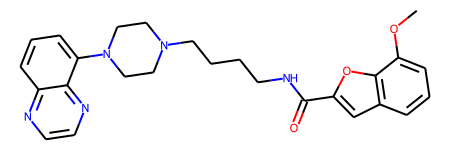

In [93]:
targetmol

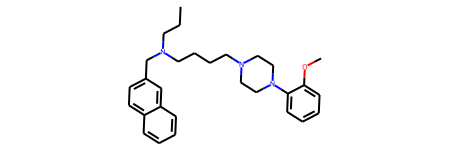

In [94]:
refmol

In [2]:
with utils.tmpdir_manager() as tmp_dir:
    tar_extractor = extractor.Extractor(
        data_dir='./debug/example',
        n_cpu=1)
    tar_extractor.extract(tmp_dir)

NameError: name 'utils' is not defined

In [12]:
full_path = './tmp6uq2a4pi/AABAAC/00000/Z1252751589_1_T1.sdf'
dirname = os.path.dirname(full_path)
basename = os.path.basename(full_path)

file_id = os.path.splitext(basename)[0]
file_id


pdbqt转fp

In [211]:
from data.tools.pipeline import  _pdbqt2fingerprint
from data.tools import pipeline

path = os.path.join('tmpycuut84t', 'AABBAC', '00000')
# out = os.path.join('tmp93eb8ia2','out')
os.makedirs('out')
for f in os.listdir(path):
    # print(f)
    file_id = os.path.splitext(f)[0]
    _pdbqt2fingerprint(path, file_id, '.sdf', 'out')

In [10]:
[os.path.splitext(f)[0] for f  in os.listdir('out')]

['Z1252751589_1_T1',
 'Z1509950178_1_T1',
 'Z1510155714_1_T1',
 'Z1614339982_1_T1',
 'Z1692816331_1_T1',
 'Z1692816331_2_T1',
 'Z2027307024_1_T1',
 'Z2027307024_1_T2',
 'Z2027307024_1_T3',
 'Z2499074481_1_T1',
 'Z2499074481_1_T2',
 'Z2499074481_1_T3',
 'Z2890544298_1_T1',
 'Z2890544298_2_T1',
 'Z2977592255_1_T1',
 'Z2980972959_1_T1']

In [36]:
import glob
glob.glob(r'{}\**\*.pdbqt'.format('tmpycuut84t'),recursive=True)
# glob.glob(r'{}\**\*.tar'.format('tmpycuut84t'),recursive=True)

['tmpycuut84t\\AABAAC\\00000\\Z1252751589_1_T1.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z1509950178_1_T1.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z1510155714_1_T1.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z1614339982_1_T1.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z1692816331_1_T1.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z1692816331_2_T1.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z2027307024_1_T1.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z2027307024_1_T2.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z2027307024_1_T3.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z2499074481_1_T1.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z2499074481_1_T2.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z2499074481_1_T3.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z2890544298_1_T1.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z2890544298_2_T1.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z2977592255_1_T1.pdbqt',
 'tmpycuut84t\\AABAAC\\00000\\Z2980972959_1_T1.pdbqt',
 'tmpycuut84t\\AABABC\\00000\\Z1252006115_1_T1.pdbqt',
 'tmpycuut84t\\AABABC\\00000\\Z1252636650_1_T1.pdbqt',
 'tmpycuut

In [62]:
from meeko import PDBQTMolecule
from openbabel import openbabel

path='tmpbqzs_1_d/AABCAF/00000'
file_id = 'Z1692919946_1_T1.pdbqt'
in_full_path = os.path.join(path, file_id)
out_full_path = 'Z1692919946_1_T1.sdf'
conv = openbabel.OBConversion(in_full_path, out_full_path)
conv.OpenInAndOutFiles('.pdbqt','.smiles')
conv.Convert()
conv.CloseOutFile()

In [75]:
a = os.path.splitext(os.path.join(path, file_id))[0]
os.path.basename(a)

'Z1692919946_1_T1'

In [72]:
from data.tools.pipeline import _cal_single_fingerprint
from openbabel import pybel

f = pybel.readfile('pdbqt',in_full_path)
mol = f.__next__()
print(mol.write("sdf", out_full_path,overwrite=True))
print(mol.write("smiles", out_full_path,overwrite=True))
f.close()
full_path = out_full_path
dir_path = os.path.dirname(full_path)
basename = os.path.basename(full_path)
file_id = os.path.splitext(basename)[0]
_cal_single_fingerprint(dir_path, file_id, 'smiles')

None
None
